Question 2: Implementing Convolution from Scratch

In [19]:
!pip install opencv-python
!pip install opencv-python-headless

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [21]:
pip show opencv-python

Name: opencv-python
Version: 4.11.0.86
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: c:\users\laiba\appdata\roaming\python\python39\site-packages
Requires: numpy, numpy, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import cv2

def apply_convolution(image, kernel=None, kernel_size=3, stride=1, padding='valid', mode='convolution'):
    """
    Manually performs 2D convolution or correlation on a grayscale image.

    Parameters:
    - image: 2D NumPy array (grayscale image)
    - kernel: 2D NumPy array (user-defined kernel, default is random)
    - kernel_size: Integer (size of the kernel matrix)
    - stride: Integer (step size for sliding the kernel)
    - padding: 'valid' (no padding) or 'same' (zero padding to maintain size)
    - mode: 'convolution' (flips kernel) or 'correlation' (direct application)
    
    Returns:
    - Convolved image as a 2D NumPy array.
    """
    # Generate a random kernel if none is provided
    if kernel is None:
        kernel = np.random.rand(kernel_size, kernel_size) - 0.5  # Random values between -0.5 and 0.5
    
    # Flip kernel for convolution mode
    if mode == 'convolution':
        kernel = np.flipud(np.fliplr(kernel))
    
    # Get image dimensions
    img_h, img_w = image.shape
    k_h, k_w = kernel.shape
    
    # Compute padding size
    if padding == 'same':
        pad_h = (k_h - 1) // 2
        pad_w = (k_w - 1) // 2
        padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    else:
        padded_image = image
    
    # Get new dimensions after applying padding
    padded_h, padded_w = padded_image.shape
    
    # Calculate output dimensions
    out_h = (padded_h - k_h) // stride + 1
    out_w = (padded_w - k_w) // stride + 1
    
    # Initialize output image
    output = np.zeros((out_h, out_w))
    
    # Perform convolution manually
    for i in range(0, out_h):
        for j in range(0, out_w):
            region = padded_image[i * stride:i * stride + k_h, j * stride:j * stride + k_w]
            output[i, j] = np.sum(region * kernel)
    
    return output

# Example Usage
if __name__ == "__main__":
    img = cv2.imread("GreyscaleImg.jpeg", cv2.IMREAD_GRAYSCALE)  # Load a grayscale image
    kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Example edge detection kernel
    result = apply_convolution(img, kernel=kernel, kernel_size=3, stride=1, padding='same', mode='convolution')
    cv2.imwrite("output.jpg", result)  # Save the convolved image


***Techniques that can be used for edge detection***
    1) Sobel operator
    2) Prewitt operator
    3) Laplacian operator

In [19]:
# Sobel operator
if __name__ == "__main__":
    img = cv2.imread("GreyscaleImg.jpeg", cv2.IMREAD_GRAYSCALE)  # Load a grayscale image
    kernel = np.array([[1, 0, -1], [-2, 0, 2], [-1, 0, 1]])  # Example edge detection kernel
    result = apply_convolution(img, kernel=kernel, kernel_size=3, stride=1, padding='same', mode='convolution')
    cv2.imwrite("EdgeDetection_SobelOperator_output.jpg", result)  # Save the convolved image

In [20]:
# Prewitt operator
if __name__ == "__main__":
    img = cv2.imread("GreyscaleImg.jpeg", cv2.IMREAD_GRAYSCALE)  # Load a grayscale image
    kernel = np.array([[1, 0, -1], [-2, 0, 2], [-1, 0, 1]])  # Example edge detection kernel
    result = apply_convolution(img, kernel=kernel, kernel_size=3, stride=1, padding='same', mode='convolution')
    cv2.imwrite("EdgeDetection_PrewittOperator_output.jpg", result)  # Save the convolved image

In [21]:
# Laplacian operator
if __name__ == "__main__":
    img = cv2.imread("GreyscaleImg.jpeg", cv2.IMREAD_GRAYSCALE)  # Load a grayscale image
    kernel = np.array([[0, 1, 0], [-1, 4, -1], [0, -1, 0]])  # Example edge detection kernel
    result = apply_convolution(img, kernel=kernel, kernel_size=3, stride=1, padding='same', mode='convolution')
    cv2.imwrite("EdgeDetection_LaplacianOperator_output.jpg", result)  # Save the convolved image

***Techniques that can be used for Blurring Image***
    1) Box Blur (Mean filter)
    2) Gaussian Blur (better for natural blurring)

In [ ]:
# Box Filter 
if __name__ == "__main__":
    img = cv2.imread("GreyscaleImg.jpeg", cv2.IMREAD_GRAYSCALE)  # Load a grayscale image
    kernel = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])  # Example edge detection kernel
    result = apply_convolution(img, kernel=kernel, kernel_size=3, stride=1, padding='same', mode='convolution')
    cv2.imwrite("BlurringImg_BoxBlur_output.jpg", result)  # Save the convolved image

In [ ]:
# Gaussian Blur
if __name__ == "__main__":
    img = cv2.imread("GreyscaleImg.jpeg", cv2.IMREAD_GRAYSCALE)  # Load a grayscale image
    kernel = np.array([[0.0625, 0.125, 0.0625], [0.125, 0.25, 0.125], [0.0625, 0.125, 0.0625]])  # Example edge detection kernel
    result = apply_convolution(img, kernel=kernel, kernel_size=3, stride=1, padding='same', mode='convolution')
    cv2.imwrite("BlurringImg_GaussianBlur_output.jpg", result)  # Save the convolved image

***Techniques that can be used for Sharpening Image***
    1) Sharpening Kernel


In [ ]:
# Sharpening Kernel
if __name__ == "__main__":
    img = cv2.imread("GreyscaleImg.jpeg", cv2.IMREAD_GRAYSCALE)  # Load a grayscale image
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, -0]])  # Example edge detection kernel
    result = apply_convolution(img, kernel=kernel, kernel_size=3, stride=1, padding='same', mode='convolution')
    cv2.imwrite("SharpeningImg_SharpeningKernel_output.jpg", result)  # Save the convolved image

Comparison between convolution and correlation

In [27]:
# Symmetric kernel Convultion result
if __name__ == "__main__":
    img = cv2.imread("GreyscaleImg.jpeg", cv2.IMREAD_GRAYSCALE)  # Load a grayscale image
    kernel = np.array([[0.125, 0.125, 0.125], [0.125, 0.125, 0.125], [0.125, 0.125, 0.125]])  # Example edge detection kernel
    result = apply_convolution(img, kernel=kernel, kernel_size=3, stride=1, padding='same', mode='convolution')
    cv2.imwrite("SymmetricConvolution_output.jpg", result)  # Save the convolved image

In [31]:
# Symmetric kernel Convultion result
if __name__ == "__main__":
    img = cv2.imread("GreyscaleImg.jpeg", cv2.IMREAD_GRAYSCALE)  # Load a grayscale image
    kernel = np.array([[0.125, 0.125, 0.125], [0.125, 0.125, 0.125], [0.125, 0.125, 0.125]])  # Example edge detection kernel
    result = apply_convolution(img, kernel=kernel, kernel_size=3, stride=1, padding='same', mode='correlation')
    cv2.imwrite("SymmetricCorrelation_output.jpg", result)  # Save the convolved image

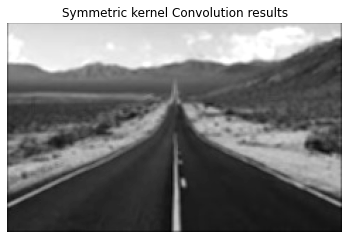

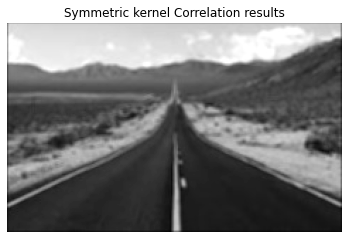

In [32]:
import matplotlib.pyplot as plt

# Function to display images
def show_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()

symmetric_convolution = cv2.imread("SymmetricConvolution_output.jpg", cv2.IMREAD_GRAYSCALE)
symmetric_correlation = cv2.imread("SymmetricCorrelation_output.jpg", cv2.IMREAD_GRAYSCALE)

# Display images
show_image("Symmetric kernel Convolution results", symmetric_convolution)
show_image("Symmetric kernel Correlation results", symmetric_correlation)


In [33]:
# Symmetric kernel Convultion result
if __name__ == "__main__":
    img = cv2.imread("GreyscaleImg.jpeg", cv2.IMREAD_GRAYSCALE)  # Load a grayscale image
    kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  # Example edge detection kernel
    result = apply_convolution(img, kernel=kernel, kernel_size=3, stride=1, padding='same', mode='convolution')
    cv2.imwrite("AsymmetricConvolution_output.jpg", result)  # Save the convolved image

In [34]:
# Symmetric kernel Convultion result
if __name__ == "__main__":
    img = cv2.imread("GreyscaleImg.jpeg", cv2.IMREAD_GRAYSCALE)  # Load a grayscale image
    kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  # Example edge detection kernel
    result = apply_convolution(img, kernel=kernel, kernel_size=3, stride=1, padding='same', mode='correlation')
    cv2.imwrite("AsymmetricCorrelation_output.jpg", result)  # Save the convolved image

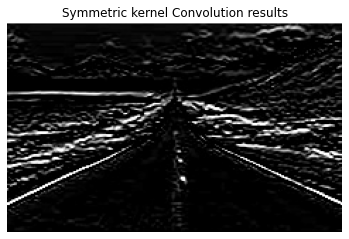

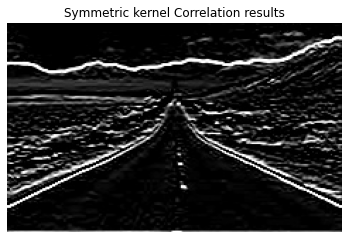

In [35]:
import matplotlib.pyplot as plt

# Function to display images
def show_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()

symmetric_convolution = cv2.imread("AsymmetricConvolution_output.jpg", cv2.IMREAD_GRAYSCALE)
symmetric_correlation = cv2.imread("AsymmetricCorrelation_output.jpg", cv2.IMREAD_GRAYSCALE)

# Display images
show_image("Symmetric kernel Convolution results", symmetric_convolution)
show_image("Symmetric kernel Correlation results", symmetric_correlation)


Compare Numpy Convolution with your manually implemented Convolution

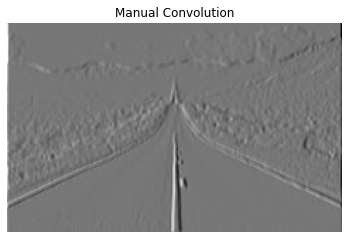

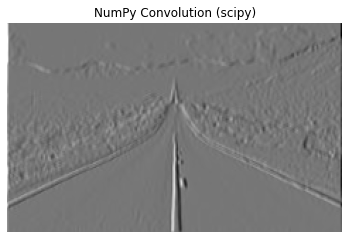

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Function to display images
def show_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Load image
img = cv2.imread("GreyscaleImg.jpeg", cv2.IMREAD_GRAYSCALE)

# Define kernel (Edge Detection Example)
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

# Manual convolution
manual_output = apply_convolution(img, kernel=kernel, kernel_size=3, stride=1, padding='same', mode='convolution')

# NumPy-based convolution
numpy_output = convolve2d(img, kernel, mode='same', boundary='fill', fillvalue=0)

# Display results
show_image("Manual Convolution", manual_output)
show_image("NumPy Convolution (scipy)", numpy_output)
